In [1]:
# Installing CatBoost
!pip install catboost
# Importing advanced gradient boosting models for classification tasks
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
# Bringing in logistic regression as a baseline model
from sklearn.linear_model import LogisticRegression
# Importing stacking and voting ensemble classifiers for model combination
from sklearn.ensemble import StackingClassifier
# Using histogram-based gradient boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Tools for model evaluation and cross-validation strategies
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
# Basic preprocessing and label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
# imports to handle data manipulation and analysis
import numpy as np
import pandas as pd
# Visualization libraries to plot data distributions and trends
import seaborn as sns
import matplotlib.pyplot as plt
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [2]:
# Accessing the GitHub links for the training and test CSV files
github_train_url = 'https://raw.githubusercontent.com/SpaceShip-Titanic-Project/Group-Project/refs/heads/main/train.csv'
github_test_url = 'https://raw.githubusercontent.com/SpaceShip-Titanic-Project/Group-Project/refs/heads/main/test.csv'
# Read the training and test datasets into separate DataFrames
spaceship_train_df = pd.read_csv(github_train_url)
spaceship_test_df = pd.read_csv(github_test_url)
# Print out the number of rows and columns in each dataset
print("Training Data Shape:", spaceship_train_df.shape)
print("Test Data Shape:", spaceship_test_df.shape)
# Take a quick look at the first few rows of the training data
spaceship_train_df.head()

Training Data Shape: (8693, 14)
Test Data Shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Checking how many values are missing in each column of the training dataset
spaceship_missing_counts = spaceship_train_df.isnull().sum()
# Calculating the percentage of missing values relative to total entries
spaceship_missing_percent = (spaceship_missing_counts / len(spaceship_train_df)) * 100
# Creating a DataFrame to summarize both missing count and percentage for each column
spaceship_null_summary = pd.DataFrame({
    'Total Missing': spaceship_missing_counts,
    'Percent Missing': spaceship_missing_percent})
# Filtering out columns that actually have missing values and sorting them in descending order
spaceship_null_summary = spaceship_null_summary[spaceship_null_summary['Total Missing'] > 0]
spaceship_null_summary = spaceship_null_summary.sort_values(by='Percent Missing', ascending=False)
# Display the final table showing columns with missing data
spaceship_null_summary

,Total Missing,Percent Missing
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


In [4]:
# Display summary statistics like mean, std, and quartiles for all numerical columns in the training data
spaceship_train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
# Show basic information about the dataset including column types, non-null counts, and memory usage
spaceship_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


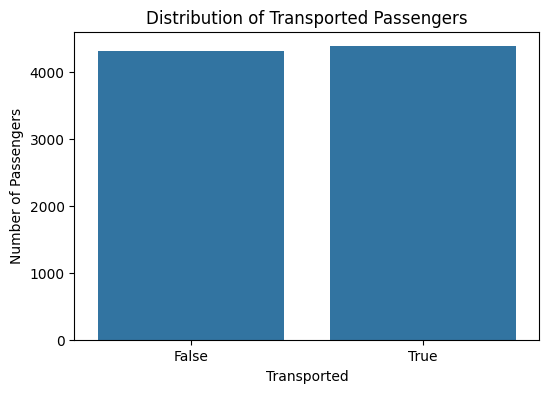

In [6]:
# Visualizing how the target variable 'Transported' is distributed in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=spaceship_train_df, x='Transported')
plt.title('Distribution of Transported Passengers')
plt.xlabel('Transported')
plt.ylabel('Number of Passengers')
plt.show()

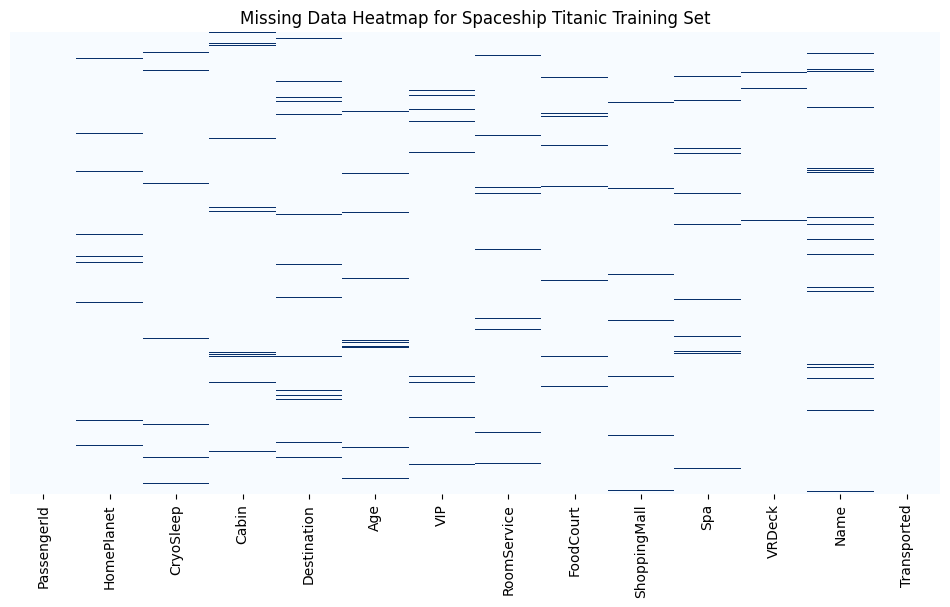

In [7]:
# Creating a heatmap to visually spot where the missing values are located in the training data
plt.figure(figsize=(12, 6))
sns.heatmap(spaceship_train_df.isnull(), cbar=False, yticklabels=False, cmap='Blues')
plt.title('Missing Data Heatmap for Spaceship Titanic Training Set')
plt.show()

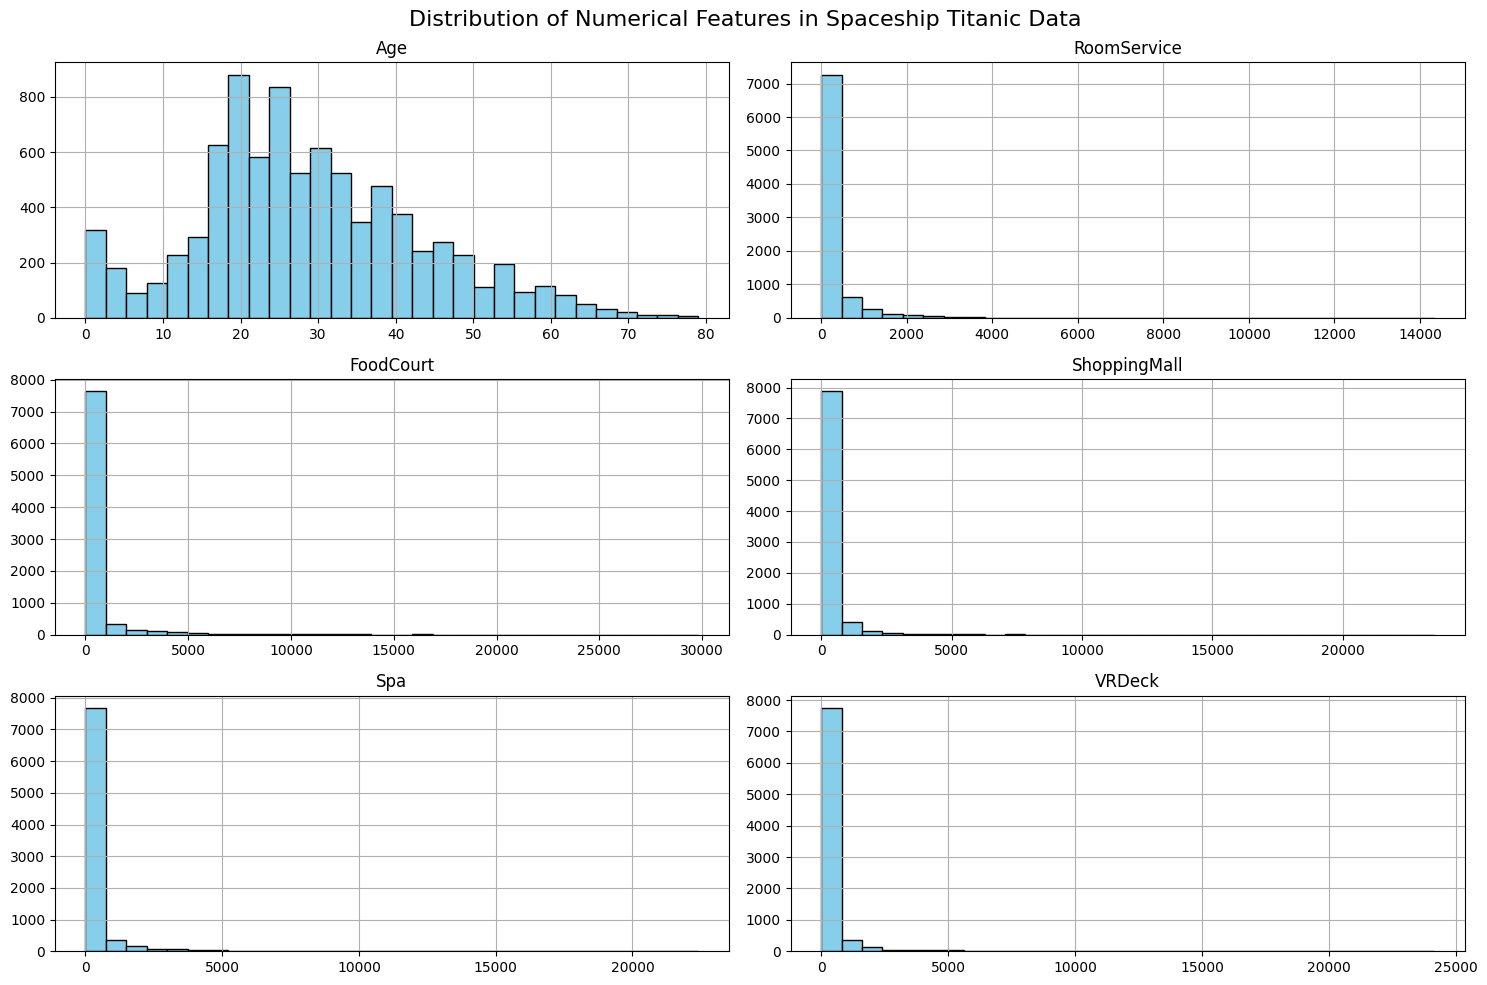

In [8]:
# Visualizing how each numerical feature related to passenger spending and age is distributed
spaceship_numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spaceship_train_df[spaceship_numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features in Spaceship Titanic Data", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# Filling missing values in numerical features with their column means from the training set
spaceship_numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in spaceship_numeric_features:
    mean_val = spaceship_train_df[feature].mean()
    spaceship_train_df.loc[:, feature] = spaceship_train_df[feature].fillna(mean_val)
    spaceship_test_df.loc[:, feature] = spaceship_test_df[feature].fillna(mean_val)

In [10]:
# Replacing missing values in categorical features with 'Unknown'
spaceship_categorical_features = spaceship_train_df.select_dtypes(include='object').columns.tolist()
# Remove the target column 'Transported'
if 'Transported' in spaceship_categorical_features:
    spaceship_categorical_features.remove('Transported')
# Fill any missing entries in these features with the placeholder 'Unknown'
for feature in spaceship_categorical_features:
    spaceship_train_df.loc[:, feature] = spaceship_train_df[feature].fillna('Unknown')
    spaceship_test_df.loc[:, feature] = spaceship_test_df[feature].fillna('Unknown')

In [11]:
# Breaking down the 'Cabin' column into three separate parts
def split_cabin_column(Shipdf):
    """
    Splits the 'Cabin' column into three separate columns: 'CabinDeck', 'CabinNum', and 'CabinSide'.

    The original 'Cabin' field is in the format 'Deck/Num/Side' 'B/5/P'.
    This function separates those parts into new columns:
    - 'CabinDeck': the deck letter
    - 'CabinNum': the cabin number
    - 'CabinSide': the side of the ship
    The original 'Cabin' column is dropped after splitting.
    Parameters:
        Shipdf (pd.DataFrame): The input DataFrame containing the 'Cabin' column.
    Returns:
        pd.DataFrame: The updated DataFrame with new cabin-related columns.
    """
    Shipdf[['CabinDeck', 'CabinNum', 'CabinSide']] = Shipdf['Cabin'].str.split('/', expand=True)
    Shipdf.drop(columns='Cabin', inplace=True)
    return Shipdf

# Apply the function on training and testing sets
spaceship_train_df = split_cabin_column(spaceship_train_df)
spaceship_test_df = split_cabin_column(spaceship_test_df)

In [12]:
# Filling in missing entries for 'CabinDeck' and 'CabinSide' with 'Unknown'.
spaceship_train_df['CabinDeck'] = spaceship_train_df['CabinDeck'].fillna('Unknown')
spaceship_train_df['CabinSide'] = spaceship_train_df['CabinSide'].fillna('Unknown')
spaceship_test_df['CabinDeck'] = spaceship_test_df['CabinDeck'].fillna('Unknown')
spaceship_test_df['CabinSide'] = spaceship_test_df['CabinSide'].fillna('Unknown')

In [13]:
# Replacing missing cabin numbers with -1 as a placeholder and converting the column to integers
spaceship_train_df['CabinNum'] = spaceship_train_df['CabinNum'].fillna(-1).astype(int)
spaceship_test_df['CabinNum'] = spaceship_test_df['CabinNum'].fillna(-1).astype(int)

In [14]:
# Creating a new column that adds up all spending-related features to represent total money spent per passenger
spend_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spaceship_train_df['TotalSpent'] = spaceship_train_df[spend_features].sum(axis=1)
spaceship_test_df['TotalSpent'] = spaceship_test_df[spend_features].sum(axis=1)

In [15]:
# Adding a new feature that shows how much each passenger spent relative to their age
spaceship_train_df['SpendPerAge'] = spaceship_train_df['TotalSpent'] / (spaceship_train_df['Age'] + 1)
spaceship_test_df['SpendPerAge'] = spaceship_test_df['TotalSpent'] / (spaceship_test_df['Age'] + 1)

In [16]:
# Creating a new column that checks if a passenger spent nothing across all optional services
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spaceship_train_df['TotalZeroSpend'] = spaceship_train_df[services].sum(axis=1) == 0
spaceship_test_df['TotalZeroSpend'] = spaceship_test_df[services].sum(axis=1) == 0

In [17]:
# Extracting the group number from 'PassengerId' to identify people who booked together or are from the same group
spaceship_train_df['Group'] = spaceship_train_df['PassengerId'].apply(lambda x: x.split('_')[0])
spaceship_test_df['Group'] = spaceship_test_df['PassengerId'].apply(lambda x: x.split('_')[0])

In [18]:
# Applying label encoding to all categorical columns using combined train and test data to avoid unseen labels
spaceship_cat_features = spaceship_train_df.select_dtypes(include='object').columns.tolist()
# Removing target column not to encode here
if 'Transported' in spaceship_cat_features:
    spaceship_cat_features.remove('Transported')
# Encode each categorical feature using values from both train and test sets
for feature in spaceship_cat_features:
    combined_values = pd.concat([spaceship_train_df[feature], spaceship_test_df[feature]], axis=0).astype(str)
    labenc_ship = LabelEncoder()
    labenc_ship.fit(combined_values)
    spaceship_train_df.loc[:, feature] = labenc_ship.transform(spaceship_train_df[feature].astype(str))
    spaceship_test_df.loc[:, feature] = labenc_ship.transform(spaceship_test_df[feature].astype(str))

In [19]:
# Encoding specific categorical features that still contain string values using combined train and test data
to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide','TotalZeroSpend']
for feature in to_encode:
    combined_vals = pd.concat([spaceship_train_df[feature], spaceship_test_df[feature]], axis=0).astype(str)
    labenc_ship = LabelEncoder()
    labenc_ship.fit(combined_vals)
    spaceship_train_df.loc[:, feature] = labenc_ship.transform(spaceship_train_df[feature].astype(str))
    spaceship_test_df.loc[:, feature] = labenc_ship.transform(spaceship_test_df[feature].astype(str))

/tmp/ipython-input-19-4145626376.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  spaceship_train_df.loc[:, feature] = labenc_ship.transform(spaceship_train_df[feature].astype(str))
/tmp/ipython-input-19-4145626376.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 1 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  spaceship_test_df.loc[:, feature] = labenc_ship.transform(spaceship_test_df[feature].astype(str))


In [20]:
# Removing ID and name columns since they don't carry useful information for prediction
spaceship_train_df.drop(columns=['PassengerId', 'Name'], inplace=True)
spaceship_test_df.drop(columns=['Name'], inplace=True)

In [21]:
# Converting the target column 'Transported' from boolean to integer format for model training
spaceship_train_df['Transported'] = spaceship_train_df['Transported'].astype(int)

In [22]:
# Making sure both train and test sets have the same columns and structure before feeding them into models
spaceship_train_df, spaceship_test_df = spaceship_train_df.align(spaceship_test_df, join='left', axis=1, fill_value=0)

In [23]:
# Doing one last check to make sure there are no missing values left in either train or test data
print("Missing in train:", spaceship_train_df.isnull().sum().sum())
print("Missing in test:", spaceship_test_df.isnull().sum().sum())

Missing in train: 0
Missing in test: 0


In [24]:
# Checking the data types of all columns to make sure everything is ready for model training
spaceship_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   object 
 1   CryoSleep       8693 non-null   object 
 2   Destination     8693 non-null   object 
 3   Age             8693 non-null   float64
 4   VIP             8693 non-null   object 
 5   RoomService     8693 non-null   float64
 6   FoodCourt       8693 non-null   float64
 7   ShoppingMall    8693 non-null   float64
 8   Spa             8693 non-null   float64
 9   VRDeck          8693 non-null   float64
 10  Transported     8693 non-null   int64  
 11  CabinDeck       8693 non-null   object 
 12  CabinNum        8693 non-null   int64  
 13  CabinSide       8693 non-null   object 
 14  TotalSpent      8693 non-null   float64
 15  SpendPerAge     8693 non-null   float64
 16  TotalZeroSpend  8693 non-null   int64  
 17  Group           8693 non-null   o

In [25]:
# Taking a quick look at the cleaned and preprocessed training data
spaceship_train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide,TotalSpent,SpendPerAge,TotalZeroSpend,Group
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0,0.000000,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,736.0,29.440000,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,10383.0,175.983051,0,2
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,5176.0,152.235294,0,2
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1091.0,64.176471,0,3


In [26]:
# Making sure that both train and test datasets have the exact same set of columns before modeling
print("Train columns:", spaceship_train_df.columns.tolist())
print("Test columns:", spaceship_test_df.columns.tolist())

Train columns: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'CabinDeck', 'CabinNum', 'CabinSide', 'TotalSpent', 'SpendPerAge', 'TotalZeroSpend', 'Group']
Test columns: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'CabinDeck', 'CabinNum', 'CabinSide', 'TotalSpent', 'SpendPerAge', 'TotalZeroSpend', 'Group']


In [27]:
# Separating the input features from the target variable 'Transported'
features_ship = spaceship_train_df.drop('Transported', axis=1)
target_ship = spaceship_train_df['Transported']
# Splitting features and target into training and validation sets with stratification to preserve class balance
features_ship_train, features_ship_val, target_ship_train, target_ship_val = train_test_split(
    features_ship, target_ship, test_size=0.2, random_state=20253, stratify=target_ship)

In [28]:
# Setting up stratified k-fold cross-validation for the spaceship dataset
ship_stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=20253)
# Initializing CatBoost model (silent training)
catboost_model_ship = CatBoostClassifier(verbose=0, random_state=20253)
# Defining hyperparameter grid for CatBoost tuning
catboost_param_grid = {
    'depth': [4, 6, 8, 10],
    'iterations': [200, 300, 400],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}
# Performing randomized search with cross-validation to tune the CatBoost model
catboost_search_ship = RandomizedSearchCV(
    estimator=catboost_model_ship,
    param_distributions=catboost_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=ship_stratified_kfold,
    verbose=1,
    random_state=20253,
    n_jobs=-1
)
# Training the CatBoost model with the best parameter combinations
catboost_search_ship.fit(features_ship_train, target_ship_train)
# Outputting the best results from the search
print("Best CatBoost Accuracy:", catboost_search_ship.best_score_)
print("Best CatBoost Params:", catboost_search_ship.best_params_)
# Storing the best performing CatBoost model
best_catboost_model_ship = catboost_search_ship.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CatBoost Accuracy: 0.8137781938360167
Best CatBoost Params: {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 200, 'depth': 4, 'border_count': 64}


In [29]:
# Making copies of the feature sets to safely apply label encoding
features_ship_train = features_ship_train.copy()
features_ship_val = features_ship_val.copy()
# Looping through all object-type columns and label encoding them based on combined train+val values
for col in features_ship_train.select_dtypes(include='object').columns:
    labenc_ship = LabelEncoder()
    combined = pd.concat([features_ship_train[col], features_ship_val[col]], axis=0).astype(str)
    labenc_ship.fit(combined)
    # Encoding both train and validation columns using the same fitted encoder
    features_ship_train[col] = labenc_ship.transform(features_ship_train[col].astype(str))
    features_ship_val[col] = labenc_ship.transform(features_ship_val[col].astype(str))
# Checking to confirm that all columns are now numeric
print(features_ship_train.dtypes)

HomePlanet          int64
CryoSleep           int64
Destination         int64
Age               float64
VIP                 int64
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
CabinDeck           int64
CabinNum            int64
CabinSide           int64
TotalSpent        float64
SpendPerAge       float64
TotalZeroSpend      int64
Group               int64
dtype: object


In [30]:
# Verifying the data types of all features in the training set to make sure they are ready for modeling
features_ship_train.dtypes

,0
HomePlanet,int64
CryoSleep,int64
Destination,int64
Age,float64
VIP,int64
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64


In [31]:
# Initializing a basic LightGBM model for classification
lightgbm_model_ship = lgb.LGBMClassifier(random_state=20253)
# Setting up a grid of hyperparameters for LightGBM to tune
lightgbm_param_grid = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40, 60],
    'max_depth': [5, 7, 9, 12]
}
# Running randomized search with stratified cross-validation to find the best parameter combination
lightgbm_search_ship = RandomizedSearchCV(
    estimator=lightgbm_model_ship,
    param_distributions=lightgbm_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=ship_stratified_kfold,
    random_state=20253,
    n_jobs=-1
)
# Fitting the LightGBM model on the training data
lightgbm_search_ship.fit(features_ship_train, target_ship_train)
# Outputting the best score and parameters found during tuning
print("Best LightGBM Accuracy:", lightgbm_search_ship.best_score_)
print("Best LightGBM Params:", lightgbm_search_ship.best_params_)

[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Best LightGBM Accuracy: 0.8104696688371804
Best LightGBM Params: {'num_leaves': 30, 'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.01}


In [32]:
# Initializing an ExtraTrees model, another ensemble tree-based method
extratrees_model_ship = ExtraTreesClassifier(random_state=20253)
# Defining the hyperparameter grid for tuning the ExtraTrees model
extratrees_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2']
}
# Running randomized search with cross-validation to find the best parameters
extratrees_search_ship = RandomizedSearchCV(
    estimator=extratrees_model_ship,
    param_distributions=extratrees_param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=ship_stratified_kfold,
    random_state=20253,
    n_jobs=-1
)
# Fitting the ExtraTrees model using the training features and labels
extratrees_search_ship.fit(features_ship_train, target_ship_train)
# Showing the best cross-validated accuracy and parameters
print("Best ExtraTrees Accuracy:", extratrees_search_ship.best_score_)
print("Best ExtraTrees Params:", extratrees_search_ship.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best ExtraTrees Accuracy: 0.7988205783324455
Best ExtraTrees Params: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20}


In [33]:
# Initializing Histogram-based Gradient Boosting model as a base estimator
histgb_model_ship = HistGradientBoostingClassifier(random_state=20253)
# Setting up the hyperparameter space to explore for the HistGB model
histgb_param_grid = {
    'max_iter': [200, 300, 500, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_leaf_nodes': [20, 31, 40, 60],
    'max_depth': [5, 10,15],
    'l2_regularization': [0.0, 1.0, 3.0, 5.0, 10.0]
}
# Performing randomized search with stratified k-fold cross-validation
histgb_search_ship = RandomizedSearchCV(
    estimator=histgb_model_ship,
    param_distributions=histgb_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=ship_stratified_kfold,
    random_state=20253,
    n_jobs=-1
)
# Training the HistGB model with best parameters on training data
histgb_search_ship.fit(features_ship_train, target_ship_train)
# Printing cross-validation accuracy, best parameters, and validation accuracy
print("Best HistGB Accuracy (CV):", histgb_search_ship.best_score_)
print("Best Params:", histgb_search_ship.best_params_)

Best HistGB Accuracy (CV): 0.8129139535244558
Best Params: {'max_leaf_nodes': 20, 'max_iter': 300, 'max_depth': 15, 'learning_rate': 0.05, 'l2_regularization': 10.0}


In [34]:
# Getting validation accuracy for CatBoost model
cat_val_preds_ship = catboost_search_ship.best_estimator_.predict(features_ship_val)
print("CatBoost Validation Accuracy:", accuracy_score(target_ship_val, cat_val_preds_ship))

# Getting validation accuracy for LightGBM model
lgb_val_preds_ship = lightgbm_search_ship.best_estimator_.predict(features_ship_val)
print("LightGBM Validation Accuracy:", accuracy_score(target_ship_val, lgb_val_preds_ship))

# Getting validation accuracy for ExtraTrees model
et_val_preds_ship = extratrees_search_ship.best_estimator_.predict(features_ship_val)
print("ExtraTrees Validation Accuracy:", accuracy_score(target_ship_val, et_val_preds_ship))

# Getting validation accuracy for Histogram-based Gradient Boosting model
hgb_val_preds_ship = histgb_search_ship.best_estimator_.predict(features_ship_val)
print("HistGB Validation Accuracy:", accuracy_score(target_ship_val, hgb_val_preds_ship))


CatBoost Validation Accuracy: 0.7918343875790684
LightGBM Validation Accuracy: 0.7981598619896493
ExtraTrees Validation Accuracy: 0.7780333525014376
HistGB Validation Accuracy: 0.7952846463484762


In [35]:
# Using logistic regression as the final meta-learner in the stacking ensemble
meta_model_ship = LogisticRegression()
# Creating a stacking classifier with the best tuned models as base learners
stacked_model_ship = StackingClassifier(
    estimators=[
        ('cat', catboost_search_ship.best_estimator_),
        ('lgb', lightgbm_search_ship.best_estimator_),
        ('et', extratrees_search_ship.best_estimator_),
        ('hgb', histgb_search_ship.best_estimator_)
    ],
    final_estimator=meta_model_ship,
    cv=5,
    n_jobs=-1,
    passthrough=False)
# Evaluating the stacked model using stratified cross-validation
stack_scores_ship = cross_val_score(
    stacked_model_ship,
    features_ship_train,
    target_ship_train,
    cv=ship_stratified_kfold,
    scoring='accuracy')
print("Stacked Model Accuracy (CV):", stack_scores_ship.mean())

Stacked Model Accuracy (CV): 0.8121956669028545


In [36]:
# Making sure the test set doesn’t contain the target column 'Transported' by mistake
if 'Transported' in spaceship_test_df.columns:
    spaceship_test_df = spaceship_test_df.drop(columns=['Transported'])

In [37]:
# Reloading the original test data to recover the PassengerId column for submission
spaceship_test_raw_url = 'https://raw.githubusercontent.com/SpaceShip-Titanic-Project/Group-Project/refs/heads/main/test.csv'
spaceship_test_raw_df = pd.read_csv(spaceship_test_raw_url)
spaceship_test_raw_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [38]:
# Copying PassengerId from the original test data to use in the final submission
passenger_ids_ship = spaceship_test_raw_df['PassengerId'].copy()
# Choosing the final model (you can switch this to the best performing model if needed)
best_final_model_ship = histgb_search_ship.best_estimator_
# Making predictions on the test set using the trained final model
test_preds_ship = best_final_model_ship.predict(spaceship_test_df)
# Creating a DataFrame in the required submission format
submission_ship_df = pd.DataFrame({
    'PassengerId': passenger_ids_ship,
    'Transported': test_preds_ship.astype(bool)})
# Saving the submission file to a CSV
submission_ship_df.to_csv('submission.csv', index=False)
# Previewing the top rows of the submission file
submission_ship_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [39]:
# Reapplying label encoding to specific columns in the test set to match the training format
label_encoded_cols_ship = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide', 'Group']
for col in label_encoded_cols_ship:
    spaceship_test_df[col] = spaceship_test_df[col].astype(str)
    labenc_ship = LabelEncoder()
    spaceship_test_df[col] = labenc_ship.fit_transform(spaceship_test_df[col])

In [40]:
# Training the final stacked model on the full training dataset
stacked_model_ship.fit(features_ship_train, target_ship_train)
# Using the stacked model to make predictions on the test set
test_preds_stack_ship = stacked_model_ship.predict(spaceship_test_df)

In [41]:
#Creating the submission DataFrame using predictions from the stacked model
submission_stack_ship = pd.DataFrame({
    'PassengerId': passenger_ids_ship,
    'Transported': test_preds_stack_ship.astype(bool)})
#Saving the stacked model predictions to a CSV file for Kaggle submission
submission_stack_ship.to_csv('submission_stack.csv', index=False)
# Previewing the top few rows of the submission file
submission_stack_ship.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
/tmp/ipython-input-42-3384512279.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shap_df, x='Mean SHAP Value', y='Base Model', palette='Blues_d')


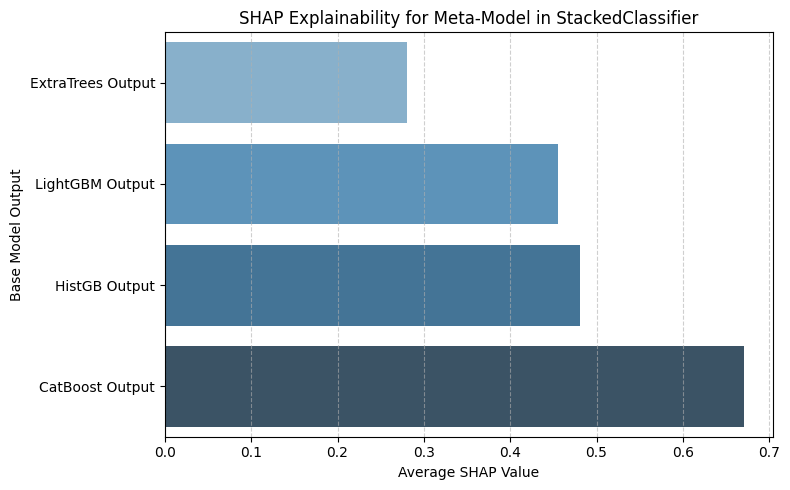

In [42]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Fit your StackingClassifier (if not already done)
stacked_model_ship.fit(features_ship_train, target_ship_train)

# Step 2: Get transformed base model outputs used by the meta-model
meta_features_val_ship = stacked_model_ship.transform(features_ship_val)

# Step 3: Extract the meta-model (e.g., LogisticRegression)
meta_model_ship = stacked_model_ship.final_estimator_

# Step 4: Use SHAP's LinearExplainer for the meta-model
explainer_meta_ship = shap.LinearExplainer(
    meta_model_ship,
    meta_features_val_ship,
    feature_perturbation="interventional"  # Correct param for latest SHAP
)

# Step 5: Compute SHAP values
shap_values_meta_ship = explainer_meta_ship.shap_values(meta_features_val_ship)

# Step 6: Optional – assign names to the inputs (base model outputs)
meta_input_names = ['CatBoost Output', 'LightGBM Output', 'ExtraTrees Output', 'HistGB Output']

# Step 7: Plot SHAP summary bar chart (better version)
shap_df = pd.DataFrame({
    'Base Model': meta_input_names,
    'Mean SHAP Value': np.abs(shap_values_meta_ship).mean(axis=0)
}).sort_values('Mean SHAP Value', ascending=True)

# Final visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=shap_df, x='Mean SHAP Value', y='Base Model', palette='Blues_d')
plt.title("SHAP Explainability for Meta-Model in StackedClassifier")
plt.xlabel("Average SHAP Value")
plt.ylabel("Base Model Output")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()